# Part 1: K-Nearest Neighbors (KNN)

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target (class labels) to the DataFrame
df['class'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the unique classes (target labels)
print("Classes in the Breast Cancer dataset:")
print(data.target_names)

# Display the shape of the dataset (rows, columns)
print("Shape of the dataset:")
print(df.shape)
df.head()

Classes in the Breast Cancer dataset:
['malignant' 'benign']
Shape of the dataset:
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target (class labels) to the DataFrame
df['class'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the unique classes (target labels)
print("Classes in the Breast Cancer dataset:")
print(data.target_names)

# Display the shape of the dataset (rows, columns)
print("Shape of the dataset:")
print(df.shape)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Classes in the Breast Cancer dataset:
['malignant' 'benign']
Shape of the dataset:
(569, 31)
Number of missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension  

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = {}

# Loop through each distance metric
for metric in distance_metrics:
    # Initialize the KNN model with the current metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)  # Get class probabilities

    # Evaluate the model  #This block of code was moved inside the for loop
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Extract the probabilities for the positive class (class 1)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Use probabilities for class 1

    # Store results
    results[metric] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }

# Print results
for metric, metrics in results.items():
    print(f"Results for {metric} distance:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Results for euclidean distance:
  Accuracy: 0.9474
  Precision: 0.9577
  Recall: 0.9577
  F1-score: 0.9577
  ROC-AUC: 0.9820
Results for manhattan distance:
  Accuracy: 0.9649
  Precision: 0.9718
  Recall: 0.9718
  F1-score: 0.9718
  ROC-AUC: 0.9831
Results for cosine distance:
  Accuracy: 0.9561
  Precision: 0.9714
  Recall: 0.9577
  F1-score: 0.9645
  ROC-AUC: 0.9821


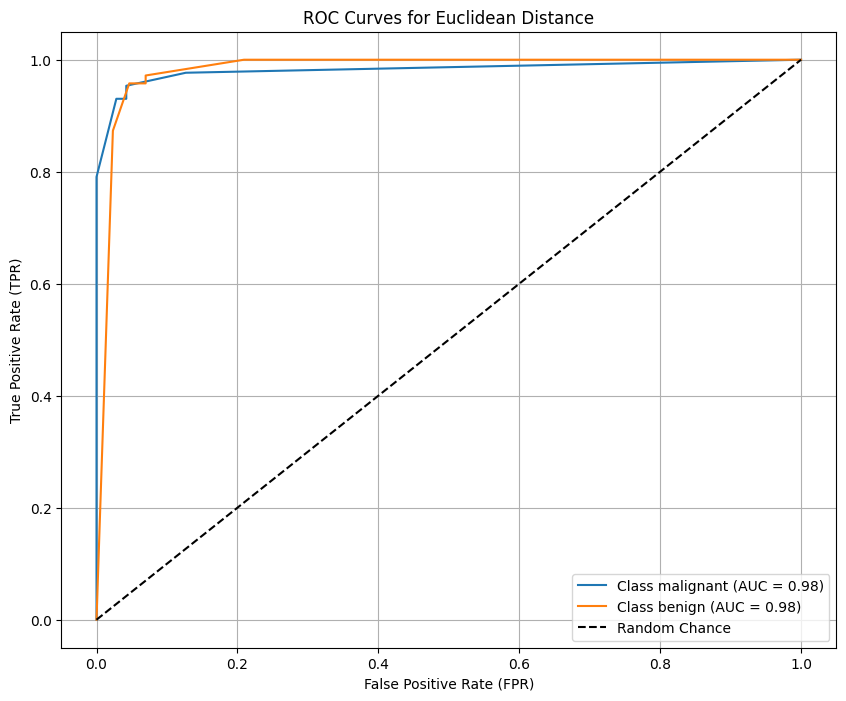

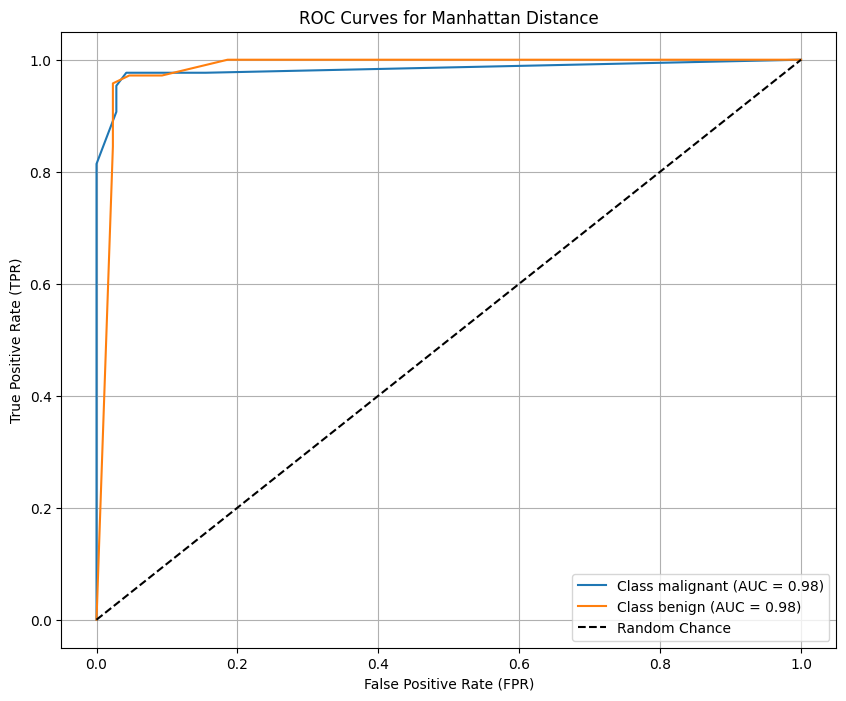

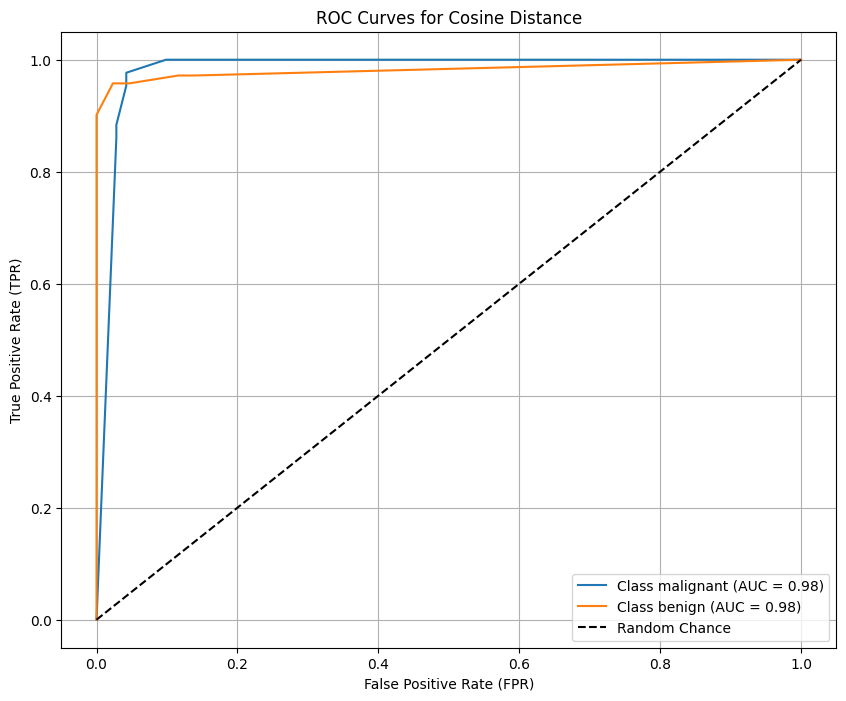

In [5]:
# Function to plot ROC curves for multi-class classification with a title for the metric
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

def plot_roc_curves(y_test, y_proba, classes, metric_name):
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(classes):
        # Compute ROC curve and AUC for each class
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

    # Plot random chance line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

    # Plot settings
    plt.title(f"ROC Curves for {metric_name.capitalize()} Distance")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Define distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Loop through metrics and plot ROC curves
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_proba = knn.predict_proba(X_test)

    # Plot ROC curves for the current metric
    plot_roc_curves(y_test, y_proba, classes=data.target_names, metric_name=metric)

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define the range of K values to test
k_values = range(1, 21)  # Test K values from 1 to 20
cv_scores = []  # To store the mean cross-validation scores for each K

# Perform cross-validation for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal K (highest cross-validation score)
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal value of K: {optimal_k}")

Optimal value of K: 8


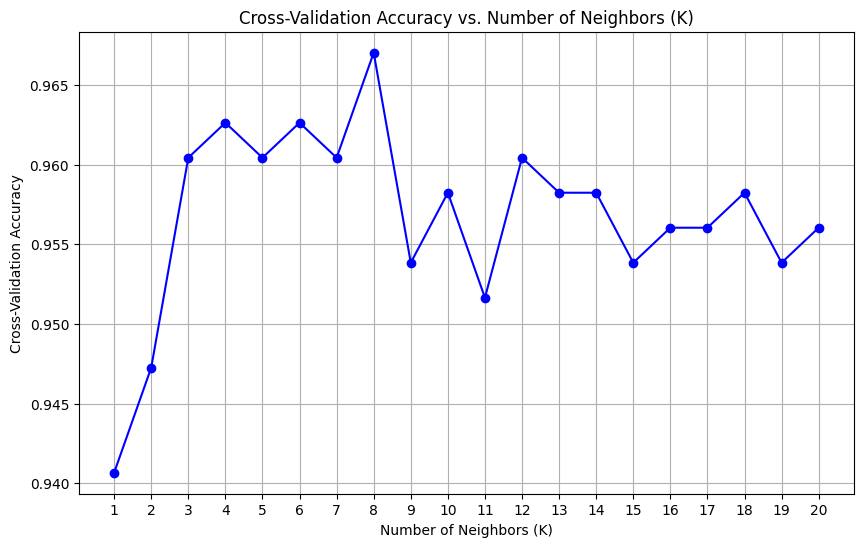

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title("Cross-Validation Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

In [9]:
#Step 4: Use the Optimal K in the Final Model
# Train and evaluate the final KNN model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with optimal K ({optimal_k}): {accuracy:.4f}")

Test Accuracy with optimal K (8): 0.9561


# Part 2: Logistic Regression

In [10]:
#Step 1: Import Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [11]:
#Step 2: Train Logistic Regression Model with Different Regularization Techniques
# Define regularization techniques to test
regularization_types = ['l1', 'l2']
results_log_reg = {}

# Loop through each regularization type
for reg in regularization_types:
    # Initialize the Logistic Regression model with specified regularization
    # Increase max_iter to allow more iterations for convergence
    log_reg = LogisticRegression(penalty=reg, solver='saga', max_iter=5000)  # Increased max_iter to 5000

    # Train the model
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)
    y_proba = log_reg.predict_proba(X_test)  # Get class probabilities

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Extract probabilities for the positive class (class 1) for ROC AUC calculation
    roc_auc = roc_auc_score(y_test, y_proba[:, 1], multi_class='ovr')  # Use probabilities for class 1

    # Store results
    results_log_reg[reg] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }


# Print results
for reg, metrics in results_log_reg.items():
    print(f"Results for Logistic Regression with {reg.upper()} regularization:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Results for Logistic Regression with L1 regularization:
  Accuracy: 0.9649
  Precision: 0.9649
  Recall: 0.9649
  F1-score: 0.9649
  ROC-AUC: 0.9967
Results for Logistic Regression with L2 regularization:
  Accuracy: 0.9737
  Precision: 0.9737
  Recall: 0.9737
  F1-score: 0.9736
  ROC-AUC: 0.9974


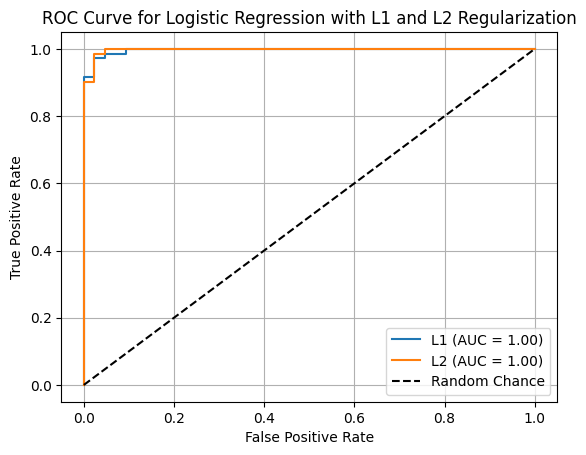

Results for Logistic Regression with L1 regularization:
  ROC-AUC: 0.9967
Results for Logistic Regression with L2 regularization:
  ROC-AUC: 0.9974


In [12]:
# Define regularization techniques to test
regularization_types = ['l1', 'l2']
results_log_reg = {}

# Function to plot ROC curves
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Loop through each regularization type
for reg in regularization_types:
    # Initialize the Logistic Regression model with specified regularization
    log_reg = LogisticRegression(penalty=reg, solver='saga', max_iter=5000)  # Increased max_iter to 5000

    # Train the model
    log_reg.fit(X_train, y_train)

    # Get probabilities
    y_proba = log_reg.predict_proba(X_test)  # Get class probabilities

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Use class 1 for ROC curve
    roc_auc = auc(fpr, tpr)

    # Store the results
    results_log_reg[reg] = {
        'ROC-AUC': roc_auc
    }

    # Plot ROC curve for this regularization type
    plot_roc_curve(fpr, tpr, roc_auc, reg.upper())

# Add labels and legend to the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Random chance line
plt.title('ROC Curve for Logistic Regression with L1 and L2 Regularization')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print results
for reg, metrics in results_log_reg.items():
    print(f"Results for Logistic Regression with {reg.upper()} regularization:")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")

# **Part 3: Support Vector Machines (SVM)**

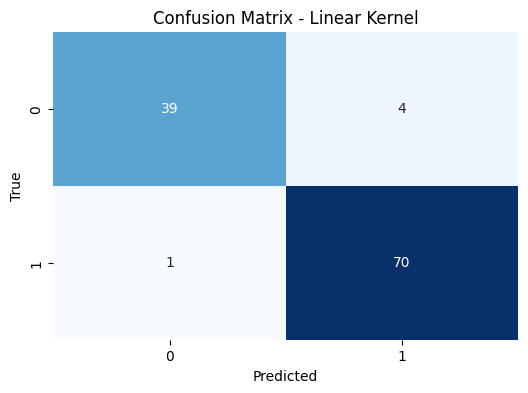

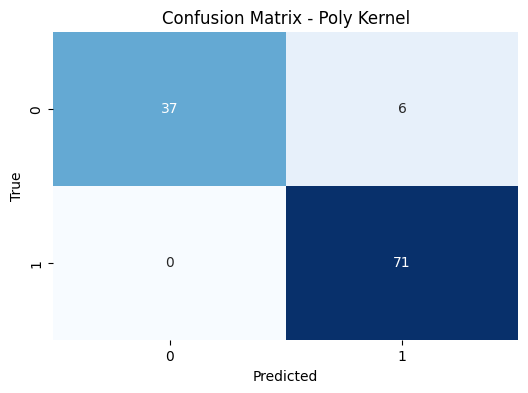

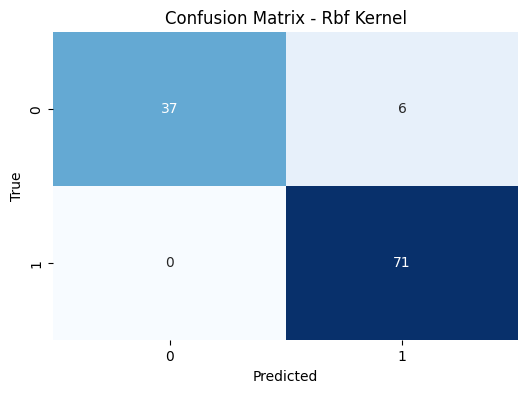

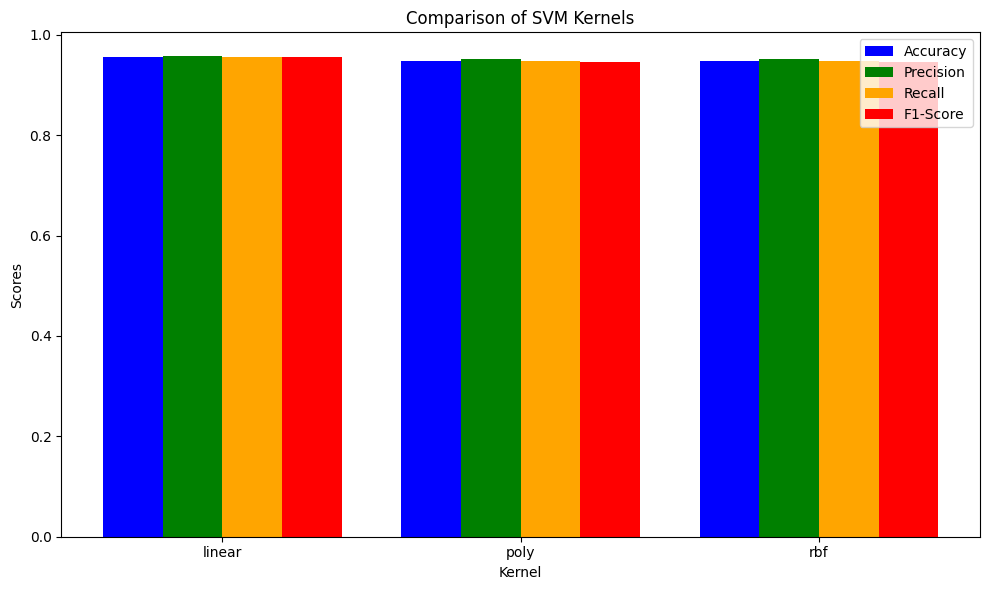

Kernel: linear
Accuracy: 0.9561
Precision (weighted avg): 0.9569
Recall (weighted avg): 0.9561
F1-Score (weighted avg): 0.9558

Kernel: poly
Accuracy: 0.9474
Precision (weighted avg): 0.9515
Recall (weighted avg): 0.9474
F1-Score (weighted avg): 0.9465

Kernel: rbf
Accuracy: 0.9474
Precision (weighted avg): 0.9515
Recall (weighted avg): 0.9474
F1-Score (weighted avg): 0.9465



In [13]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target (class labels) to the DataFrame
df['class'] = pd.Categorical.from_codes(data.target, data.target_names)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kernels to compare
kernels = ['linear', 'poly', 'rbf']
results = {}
metrics_summary = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and evaluate models
for kernel in kernels:
    # Train SVM model
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[kernel] = report

    # Collect metrics for visualization
    metrics_summary['Kernel'].append(kernel)
    metrics_summary['Accuracy'].append(report['accuracy'])
    metrics_summary['Precision'].append(report['weighted avg']['precision'])
    metrics_summary['Recall'].append(report['weighted avg']['recall'])
    metrics_summary['F1-Score'].append(report['weighted avg']['f1-score'])

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {kernel.capitalize()} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig(f"confusion_matrix_{kernel}.png")
    plt.show()

# Performance comparison bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(kernels))
width = 0.2

plt.bar(x - width, metrics_summary['Accuracy'], width, label='Accuracy', color='blue')
plt.bar(x, metrics_summary['Precision'], width, label='Precision', color='green')
plt.bar(x + width, metrics_summary['Recall'], width, label='Recall', color='orange')
plt.bar(x + 2 * width, metrics_summary['F1-Score'], width, label='F1-Score', color='red')

plt.xticks(x + width / 2, kernels)
plt.title('Comparison of SVM Kernels')
plt.ylabel('Scores')
plt.xlabel('Kernel')
plt.legend()
plt.tight_layout()
plt.savefig("svm_kernels_comparison.png")
plt.show()

# Print metrics for each kernel
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision (weighted avg): {metrics['weighted avg']['precision']:.4f}")
    print(f"Recall (weighted avg): {metrics['weighted avg']['recall']:.4f}")
    print(f"F1-Score (weighted avg): {metrics['weighted avg']['f1-score']:.4f}")
    print()


# **Part 4: Ensemble Methods**

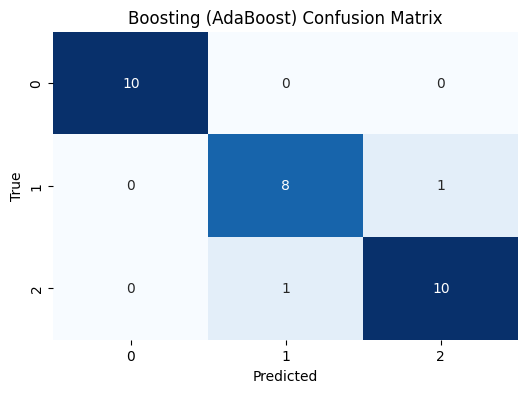

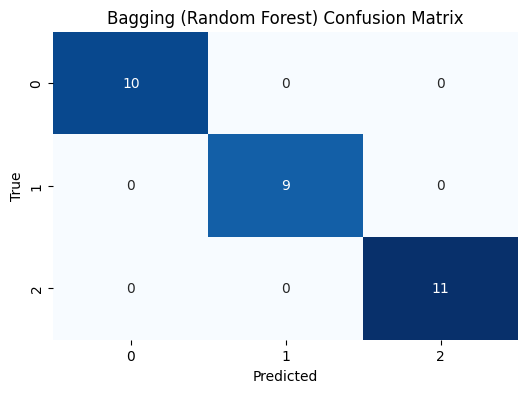

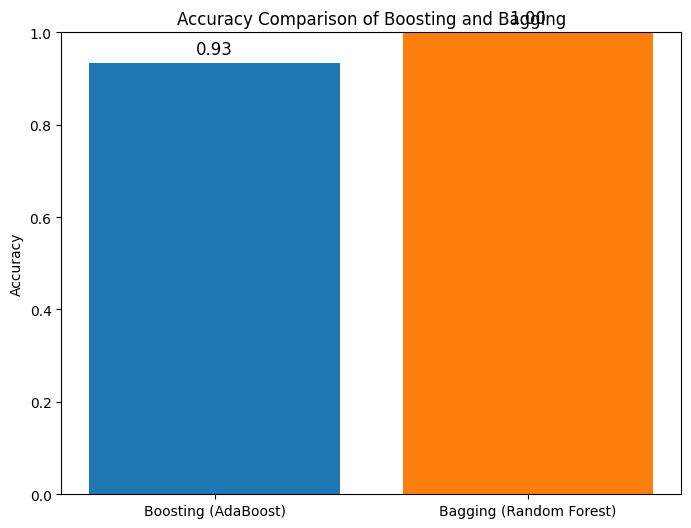

Boosting (AdaBoost) Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Boosting Accuracy: 0.9333

Bagging (Random Forest) Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Bagging Accuracy: 1.0000

Bagging performed better with an accuracy of 1.0000 compared to Boosting's 0.9333.


In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target (class labels) to the DataFrame
df['class'] = pd.Categorical.from_codes(data.target, data.target_names)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Boosting: Train a model using AdaBoost ---
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_acc = accuracy_score(y_test, boosting_pred)

# --- 2. Bagging: Train a model using Random Forest ---
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# --- Visualize Confusion Matrices ---
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

boosting_cm = confusion_matrix(y_test, boosting_pred)
bagging_cm = confusion_matrix(y_test, bagging_pred)

plot_confusion_matrix(boosting_cm, "Boosting (AdaBoost) Confusion Matrix")
plot_confusion_matrix(bagging_cm, "Bagging (Random Forest) Confusion Matrix")

# --- Visualize Accuracy Comparison ---
methods = ['Boosting (AdaBoost)', 'Bagging (Random Forest)']
accuracies = [boosting_acc, bagging_acc]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
bars = plt.bar(methods, accuracies, color=colors)
plt.title('Accuracy Comparison of Boosting and Bagging')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()


# --- Print Classification Reports ---
print("Boosting (AdaBoost) Results:")
print(classification_report(y_test, boosting_pred))
print(f"Boosting Accuracy: {boosting_acc:.4f}\n")

print("Bagging (Random Forest) Results:")
print(classification_report(y_test, bagging_pred))
print(f"Bagging Accuracy: {bagging_acc:.4f}\n")

# --- Print Comparison ---
if boosting_acc > bagging_acc:
    print(f"Boosting performed better with an accuracy of {boosting_acc:.4f} compared to Bagging's {bagging_acc:.4f}.")
else:
    print(f"Bagging performed better with an accuracy of {bagging_acc:.4f} compared to Boosting's {boosting_acc:.4f}.")
